### Ice Shapes
S4.4 of Gerakines & Hudson 2020 (https://iopscience.iop.org/article/10.3847/1538-4357/abad39) gives "IR absorption coefficient α(ν̃) (in cm−1)":
$$\alpha(\tilde{\nu}) = 4 \pi \tilde{\nu} k(\tilde{\nu})$$
and the band strength A (in cm molecule−1):
$$A = \frac{1}{\rho_N} \int_{band} \alpha(\tilde{\nu})d \tilde{\nu}$$

where $\rho_N$ is the number density of the absorbers (in molecules cm$^{-3}$) 

$\alpha(\tilde{\nu})$ is the IR absorption coefficient in cm$^{-1}$.

$A$ is the band strength in cm/molecule

Hudgins 1993 (https://ui.adsabs.harvard.edu/abs/1993ApJS...86..713H/abstract) eqn 8 is:
$$A = \frac{1}{N}\int \tau d\nu$$
where $N$ is the number density of molecules (molecules per area).

Some algebra to get $\tau$, the observable, from the data:

$$A N = \int \tau_\nu d\nu$$

$$\frac{d}{d\nu} A N = \frac{d}{d\nu}\int \tau_\nu d\nu$$

$$N \frac{d}{d\nu} A = \tau_\nu $$

$$N \frac{\alpha_\nu}{\rho_N} = \tau_\nu $$

$$\tau_\nu = N \frac{\alpha_\nu}{\rho_N} = N \frac{4 \pi \tilde{\nu} k}{\rho_N}$$

### Compare to Gerakines

Verifying that the integral of opacity equals A

A in Table 3 is about $1\times10^{-17}$ cm/molecule

In [1]:
import numpy as np
from astropy import units as u
from icemodels.core import retrieve_gerakines_co, absorbed_spectrum
gerakines_tbl = retrieve_gerakines_co()
A_CO_Gerakines = 1e-17*u.cm

In [2]:
xarr = np.linspace(4.6, 4.75, 1000)*u.um
ice_column = 1 * u.cm**-2
opacity = absorbed_spectrum(ice_column=ice_column, ice_model_table=gerakines_tbl, return_tau=True, xarr=xarr)

In [3]:
dnu = np.abs(xarr.to(u.cm**-1, u.spectral()).diff())
A_CO_Gerakines_inferred = (opacity[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_Gerakines_inferred, A_CO_Gerakines, A_CO_Gerakines_inferred/A_CO_Gerakines

(<Quantity 1.42014076e-17 cm>, <Quantity 1.e-17 cm>, <Quantity 1.42014076>)

## Try it again for non-pure

In [10]:
from icemodels.core import read_lida_file, read_ocdb_file, optical_constants_cache_dir
coco2 = read_lida_file(f'{optical_constants_cache_dir}/60_CO:CO2_1:1_25.0K.txt')

opacity_CO = absorbed_spectrum(ice_column=ice_column, ice_model_table=coco2, return_tau=True, xarr=xarr)
A_CO_coco2 = (opacity_CO[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_coco2, A_CO_coco2/A_CO_Gerakines

(<Quantity 3.65180995e-18 cm>, <Quantity 0.365181>)

In [11]:
h2oco = read_lida_file(f'{optical_constants_cache_dir}/142_H2O:CO_(100:14)_10.0K.txt')
opacity_h2oco = absorbed_spectrum(ice_column=ice_column, ice_model_table=h2oco, return_tau=True, xarr=xarr)
A_CO_h2oco = (opacity_h2oco[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_h2oco, A_CO_h2oco/A_CO_Gerakines, A_CO_h2oco/A_CO_Gerakines * 100/14. 

(<Quantity 2.84524482e-19 cm>, <Quantity 0.02845245>, <Quantity 0.20323177>)

In [12]:
h2oco_Elsila = read_ocdb_file(f'{optical_constants_cache_dir}/39_H2O:CO_(20:1)_12K_Elsila.txt')
opacity_h2oco_Elsila = absorbed_spectrum(ice_column=ice_column, ice_model_table=h2oco_Elsila, return_tau=True, xarr=xarr)
A_CO_h2oco_Elsila = (opacity_h2oco_Elsila[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_h2oco_Elsila, A_CO_h2oco_Elsila/A_CO_Gerakines, A_CO_h2oco_Elsila/A_CO_Gerakines * 20.

(<Quantity 2.99709056e-18 cm>, <Quantity 0.29970906>, <Quantity 5.99418113>)

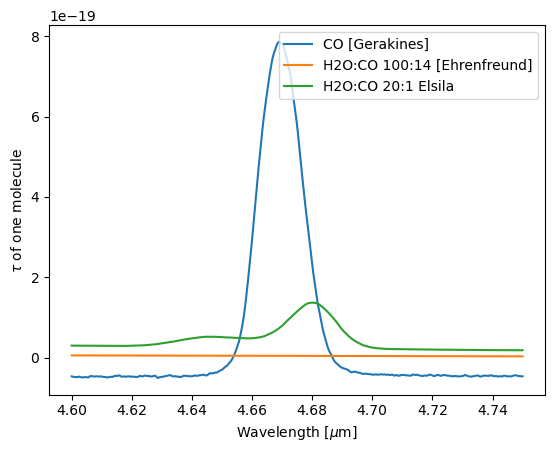

In [19]:
import pylab as pl
pl.plot(xarr, opacity_CO, label='CO [Gerakines]')
pl.plot(xarr, opacity_h2oco, label='H2O:CO 100:14 [Ehrenfreund]')
pl.plot(xarr, opacity_h2oco_Elsila, label='H2O:CO 20:1 Elsila')
pl.legend(loc='upper right')
pl.xlabel("Wavelength [$\\mu$m]");
pl.ylabel("$\\tau$ of one molecule");

## Conclusion?

We always get the right order-of-magnitude, but the A-values are pretty different.  For CO$_2$, that's expected because the shape of the line profile actually changes (see Ehrenfreund).  For H$_2$O, ... nothing makes sense.